## Week 16 Homework: SVMs, over, and under sampling

### Loading all of the usual suspects before I get started on the questions.

In [1]:
import numpy as np
import pandas as pd

#Visualization packages
import seaborn as sns
import matplotlib as plt

#Scikit-learn modules, collections, and imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import classification_report_imbalanced

### Loading the 2 datasets we will use this week:

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')

In [11]:
credit_df = pd.read_table("australian.dat", sep=" ", header = None)
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### 1) Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

#### Code for SMOTEENN:

In [5]:
#Test, train, split and using a standard scaler to standardize data

#Setting X and y values
X = diabetes_df.drop('Outcome',axis = 1)
y = diabetes_df['Outcome']

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#Standardize
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

balanced accuracy score (SMOTEEN): 0.7088888888888889
                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      0.64      0.78      0.73      0.71      0.49       100
          1       0.54      0.78      0.64      0.64      0.71      0.50        54

avg / total       0.74      0.69      0.73      0.70      0.71      0.50       154



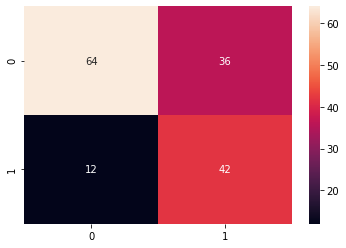

In [9]:
from imblearn.combine import SMOTEENN 
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaler, y_train)

model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_scaler)

bal_acc_SMOTEENN = balanced_accuracy_score(y_test, y_pred)
print('balanced accuracy score (SMOTEEN):', bal_acc_SMOTEENN)

cf_matrix_smoteenn = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_smoteenn, annot=True)

print(classification_report_imbalanced(y_test, y_pred))

**SMOTEENN descriptions:**

SMOTEEN stands for synthetic minority oversampling technique-edited nearest neighbors. It combines the minority oversampling from SMOTE where a random example from the minority class is chosen along with a random nearest neighbor. The synthetic data point is selected randomly on a line between the minority example and the nearest neighbor point then is added to the minority dataset. This can be repeated until the desired representation of the minority class is reached. The ENN part of SMOTEENN describes the process by which misclassified data points are selected for removal. Points can be removed from the majority, minority, or any/all classes by selecting those parameters when defining SMOTEENN in the code.

### 2) Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

**Comparison of techniques:**

Based on the logistic regression, logistic regression with SMOTE, and logistic regression with SMOTEENN, it appears that the precision is slightly higher for SMOTEENN than SMOTE but the recall is a tiny bit higher for SMOTE. Both resampling techniques improve model performance. 

I do womder if performing additional preprocessing could be helpful. I will rerun recursive feature analysis to see if feature selection can help improve performance.

### 3) What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outliers are data (either single or multiple points) which do not fit the general trend or pattern of the rest of the dataset. Generally, outliers can be the result of error (human, machine, experimental, sampling, processing, etc), can be included intentionally to test limits of the model, or can represent a true value of the data (called a novelty). The origin of the outlier can also have implications for how it is treated. For instance, in climate (and in particular, in temperature) data, there have been many cases where we see the entire data distribution shifting as our climate changes in response to human influences, leading in some cases to significant outliers that are based on true values and should be included as possibilities in models.

Outliers have the potential to significantly impact a model's performance. As a result, we need to have an understanding of outliers, the underlying causes of those outliers, how to detect them, and how to handle them. The process of outlier detection allows separation of the dataset into outliers and non-outliers. This is useful for many reasons. We can use these classifications to exclude data (for instance, if we know it is due to error), include (if we know it is a novelty and an actual observation/occurence), or to tag samples that may be suspicious (we could for instance look at model output and performance with and without these points). Outliers sometimes can unveil sources of error that should be addressed and other times can help uncover very interesting and important features. 

There are several different methods that we can use for outlier detection.

First, outliers can be univariate (found in a single feature space) or multivariate (found in multi-feature space). This is important to understand so we can consider how many features are considered and how.

Ideally, we would also understand something about the data distribution and the distribution of our outliers.

The z-score is a common method of outlier detection (parametric distribution). The z-score assumes a gaussian data distribution and indicates how many standard deviations the value of a given point is away from the mean. A threshold (often 2.5-3.5 standard deviations from the mean) can be selected and used to separate the values in the dataset into outliers and non-outliers. While there are other methods that can be used for parametric distributions, the z-score is the simplest and most widely used. Scipy and sci-kit learn have functions to calculate z-score.

Dbscan (density based spatial clustering of applications with noise) is a non-parametric method of outlier detection. This technique identifies neighbors based on density clustering of data points within defined limits/distances in feature space. Points outside of the density cluster are considered outliers. Sci-kit learn has a Dbscan function. This is an unsupervised learning method and it will determine based on the data how many clusters exist. Data deemed outliers are given a designation of -1. These data points may sometimes be considered noise and with the -1 designation may be easily removed or studied.

Another example of outlier detection is isolated forest (also a non-parametric method and unsupervised learning technique). There is a built in module within sci-kit learn to use an isolated forest for outlier detection. This algorithm works well for large datasets and is relatively simple computationally, which leads to more reasonable computation times. This technique is based on the idea of a decision tree. Anomalous data (which will be labeled as outliers) have shorter paths compared to "normal" data.

### 4) Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . 
### Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 


#### You can use this code, but otherwise you follow standard practices we have already used many times: 
#### from sklearn.svm import SVC
#### classifier = SVC(kernel='linear')

In [17]:
# importing the SVC module from scikit-learn
from sklearn.svm import SVC 


Preprocessing the data


NaN values: The documentation indicates that there were missing values initially but these have been replaced by the mode for categorical values and the mean for continuous values.

Splitting into train, test datasets and standardizing the data using a standard scaler

In [51]:
#Test, train, split and using a standard scaler to standardize data

#Setting X and y values
X_c = credit_df.drop([14],axis = 1)
y_c = credit_df[14]
print(X_c)
print(y_c)
credit_df
X_c

#Train, test, split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 42, stratify = y_c)
#print(X_train_c)
#print(X_test_c)
#print(y_train_c)
#print(y_test_c)

#Standardize
#sc = StandardScaler()
#X_train_scaler = sc.fit_transform(X_train)
#X_test_scaler = sc.fit_transform(X_test)

     0      1       2   3   4   5      6   7   8   9   10  11   12    13
0     1  22.08  11.460   2   4   4  1.585   0   0   0   1   2  100  1213
1     0  22.67   7.000   2   8   4  0.165   0   0   0   0   2  160     1
2     0  29.58   1.750   1   4   4  1.250   0   0   0   1   2  280     1
3     0  21.67  11.500   1   5   3  0.000   1   1  11   1   2    0     1
4     1  20.17   8.170   2   6   4  1.960   1   1  14   0   2   60   159
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ..  ..  ..  ...   ...
685   1  31.57  10.500   2  14   4  6.500   1   0   0   0   2    0     1
686   1  20.67   0.415   2   8   4  0.125   0   0   0   0   2    0    45
687   0  18.83   9.540   2   6   4  0.085   1   0   0   0   2  100     1
688   0  27.42  14.500   2  14   8  3.085   1   1   1   0   2  120    12
689   1  41.00   0.040   2  10   4  0.040   0   1   1   0   1  560     1

[690 rows x 14 columns]
0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1


In [52]:
#setting the classifier to be a linear SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train_c, y_train_c)
y_pred_c =classifier.predict(X_test_c)
print("SVC score:", classifier.score(X_test_c, y_test_c))
#print(classifier.score(X_test_c,y_test_c))




#y_pred_s = model_s.predict(X_test_scalers)

#bal_acc_SVC = balanced_accuracy_score(y_test_c, y_pred_c)
#print('balanced accuracy score (SMOTE):', bal_acc_SMOTE)

#cf_matrix_smote = confusion_matrix(y_tests, y_pred_s)

#cf_matrix_naive = confusion_matrix(y_test, y_pred)
#sns.heatmap(cf_matrix_smote, annot=True)

#print(classification_report_imbalanced(y_tests, y_pred_s))

SVC score: 0.7898550724637681


### 5) How did the SVM model perform? Use a classification report. 

In [54]:
#Code:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Checking cross validation score
cv_scores = cross_val_score(classifier, X_train_c, y_train_c, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.84


[[54 23]
 [ 6 55]]


<AxesSubplot:>

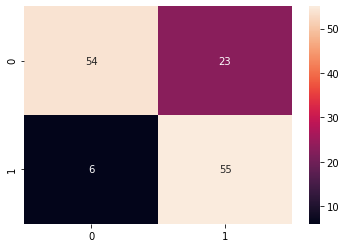

In [55]:
#y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test_c, y_pred_c)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True)

In [56]:
#Classification Report

c_r = classification_report(y_test_c, y_pred_c)
print(c_r)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        77
           1       0.71      0.90      0.79        61

    accuracy                           0.79       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.81      0.79      0.79       138



**Description:**
Overall, the linear SVC performed fairly well without adjusting the hyperparameters or doing much in the way of preprocessing the data. The recall, precision, and accuracy scores are all around 0.8. From the confusion matrix and classification report, we can see that the precision for class 1 is quite a bit lower but the recall for class 0 is pretty low. In terms of credit approval rating, the recall for credit denial is poor in comparison to credit approval. So, more people are misclassified in terms of not receiving approval.

### 6) What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 

I recently learned about Earth analytics. Essentially, Earth analytics merges the study of Earth Science with data science/analytics. The focus is on the use of data driven approaches to understand, evaluate, and provide solutions for Earth and environmental science processes and issues. Ideally, I would love to work in this field. In particular, I am really passionate about using data driven techniques to advance science and find creative solutions to problems at the interface between humans and our environment. I would really love to find a job in this field because it would explicitly use my expertise from my Ph.D. and postdoctoral research. I still have a huge passion for science and it would be unbelievable to combine my love for science, society, and data in a career. 

With that said, I don’t want to back myself into too much of a corner. So while I would love to work in Earth analytics, I could also see myself being content in other roles. I would love to find ways to stay connected to broadly science related industries. I could see myself being happy in a data science role. I really enjoy digging into complex and societally important problems, thinking about things in new and creative ways. I enjoy finding ways to take complex datasets and concepts and turn them into products and visuals that enable me to communicate those complex subjects clearly to audiences of subject matter experts and laypeople alike. Additionally, I really enjoy data visualization (although I have a LOT left to learn on that end). Related to the previous two points, I love being able to tell a story with data and visualizations and would really enjoy a job that allows me to do that. 

This class has also been really helpful in understanding some of the topics I’m not as excited about. I enjoyed learning about databases and their organization, but I would prefer not to be the person building them. I’m much more interested in the analysis, presentation, and visualization of data rather than designing and implementing the underlying data structures. I would be happy to do it as part of a larger project, but I would really want those higher level problem solving skills and communication skills to be part of my projects as well. 
